In [2]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import os
os.listdir('../Landsat8')

['LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif',
 'LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif']

In [4]:
band4 = rasterio.open('../Landsat8/LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif')
band5 = rasterio.open('../Landsat8/LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif')

In [6]:
#See the number of colums in band 4
band4.width

2107

In [7]:
#See the number of rows in band 4
band4.height

1338

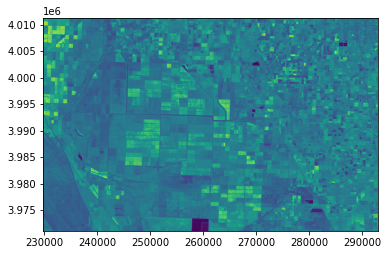

In [8]:
plot.show(band4)

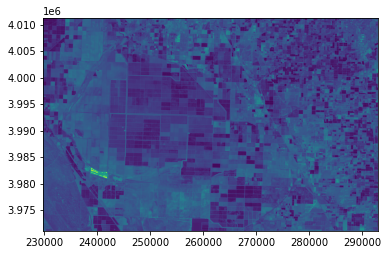

In [9]:
plot.show(band5)

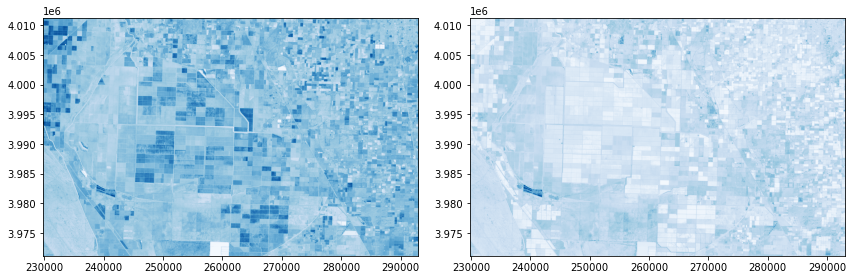

In [10]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band5, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

In [12]:
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

nir

array([[ 7479.,  7474.,  7472., ...,  8970.,  9186.,  9849.],
       [ 7482.,  7488.,  7477., ...,  9048.,  9151.,  9667.],
       [ 7497.,  7468.,  7454., ...,  9115.,  9150., 10156.],
       ...,
       [17295., 16415., 16222., ..., 11569., 11376., 11254.],
       [17162., 16303., 15322., ..., 11617., 11278., 11115.],
       [16905., 16026., 15720., ..., 12508., 12893., 13168.]])

In [13]:
#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi[:5,:5]

array([[-0.52601559, -0.525987  , -0.5271335 , -0.52442396, -0.52136479],
       [-0.52721873, -0.52758588, -0.52751975, -0.5246888 , -0.52311125],
       [-0.52774803, -0.53187488, -0.52999779, -0.52700989, -0.52593861],
       [-0.53090761, -0.52997044, -0.52947468, -0.52603985, -0.52432536],
       [-0.5317881 , -0.52931154, -0.53190956, -0.52842704, -0.52400689]])

In [14]:
#export ndvi image
ndviImage = rasterio.open('../Output/ndviImage.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

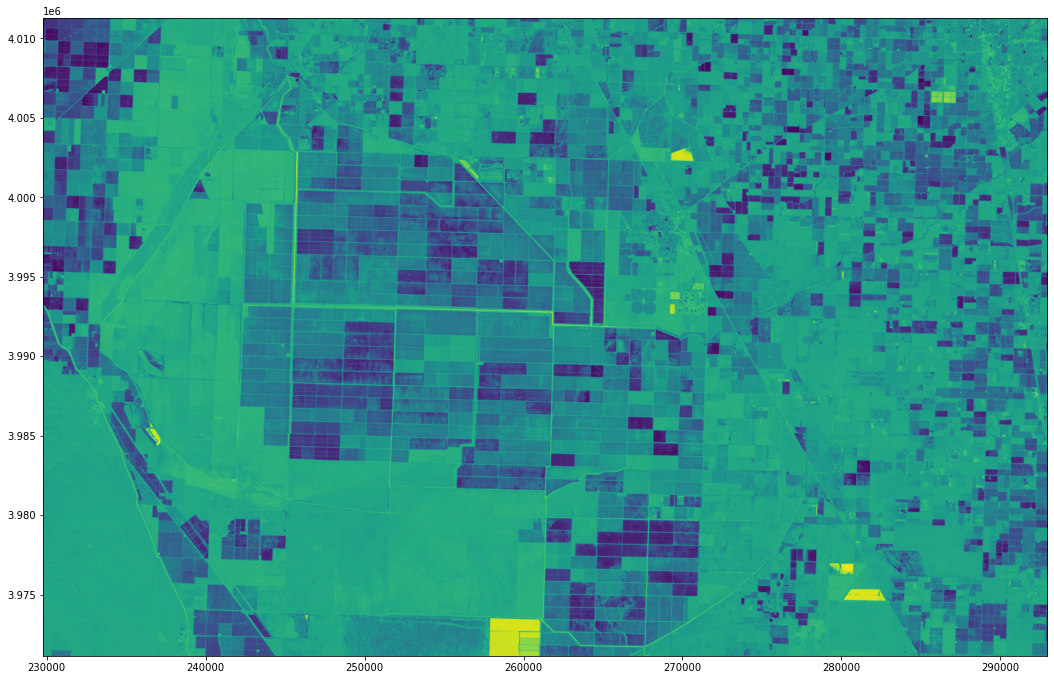

In [15]:
#plot ndvi
ndvi = rasterio.open('../Output/ndviImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi)